In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [25]:
df  = pd.read_csv("data/한국가스공사_시간별 공급량_20181231.csv", encoding='euc-kr')

In [26]:
df.columns = ['date', 'time', 'type', 'supply']

In [27]:
df['timestamp'] = df.date
for i in tqdm(range(len(df.timestamp))):
    df.timestamp.iloc[i] = df.timestamp.iloc[i] + ':' + str(df.time.iloc[i])

  0%|          | 0/368088 [00:00<?, ?it/s]C:\Users\qja19\AppData\Local\Temp\ipykernel_17980\2920779855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.timestamp.iloc[i] = df.timestamp.iloc[i] + ':' + str(df.time.iloc[i])
100%|██████████| 368088/368088 [01:24<00:00, 4377.11it/s]


In [28]:
for i in tqdm(range(len(df.timestamp))):
    y, m, d = df.date.iloc[i].split('-')

    df.loc[i, 'year'] = y
    df.loc[i, 'month'] = m
    df.loc[i, 'day'] = d
print(df.head())
df.to_csv('data/kor_gas.csv', encoding='utf-8', index=False)

100%|██████████| 368088/368088 [01:03<00:00, 5780.89it/s]


         date  time type    supply     timestamp  year month day
0  2013-01-01     1    A  2497.129  2013-01-01:1  2013    01  01
1  2013-01-01     2    A  2363.265  2013-01-01:2  2013    01  01
2  2013-01-01     3    A  2258.505  2013-01-01:3  2013    01  01
3  2013-01-01     4    A  2243.969  2013-01-01:4  2013    01  01
4  2013-01-01     5    A  2344.105  2013-01-01:5  2013    01  01


In [29]:
#"연월일","시간","구분","공급량"
a_df = df.loc[df.구분 == 'A']
print(a_df.head())

AttributeError: 'DataFrame' object has no attribute '구분'

In [4]:
a_df['timestamp'] = a_df.연월일
for i in range(len(a_df.timestamp)):
    a_df.timestamp.iloc[i] = a_df.timestamp.iloc[i] + str(a_df.시간.iloc[i])

C:\Users\qja19\AppData\Local\Temp\ipykernel_17980\244365287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df['timestamp'] = a_df.연월일
C:\Users\qja19\AppData\Local\Temp\ipykernel_17980\244365287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.timestamp.iloc[i] = a_df.timestamp.iloc[i] + str(a_df.시간.iloc[i])


In [5]:
a_df.loc[:, 'diff1'] = a_df.loc[:, '공급량'].diff()

C:\Users\qja19\AppData\Local\Temp\ipykernel_17980\2535845517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:, 'diff1'] = a_df.loc[:, '공급량'].diff()


In [6]:
a_df.head()

,연월일,시간,구분,공급량,timestamp,diff1
0,2013-01-01,1,A,2497.129,2013-01-011,NaN
1,2013-01-01,2,A,2363.265,2013-01-012,-133.864
2,2013-01-01,3,A,2258.505,2013-01-013,-104.760
3,2013-01-01,4,A,2243.969,2013-01-014,-14.536
4,2013-01-01,5,A,2344.105,2013-01-015,100.136


In [7]:
a_df['year'] = a_df.timestamp
a_df['momth'] = a_df.timestamp
a_df['day'] = a_df.timestamp
for i in range(len(a_df.timestamp)):
    y, m, d = a_df.연월일.iloc[i].split('-')
    a_df.loc[i, 'year'] = y
    a_df.loc[i, 'month'] = m
    a_df.loc[i, 'day'] = d
a_df.drop('연월일', axis=1)

C:\Users\qja19\AppData\Local\Temp\ipykernel_17980\245977754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df['year'] = a_df.timestamp
C:\Users\qja19\AppData\Local\Temp\ipykernel_17980\245977754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df['momth'] = a_df.timestamp
C:\Users\qja19\AppData\Local\Temp\ipykernel_17980\245977754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,시간,구분,공급량,timestamp,diff1,year,momth,day,month
0,1.0,A,2497.129,2013-01-011,NaN,2013,2013-01-011,01,01
1,2.0,A,2363.265,2013-01-012,-133.864,2013,2013-01-012,01,01
2,3.0,A,2258.505,2013-01-013,-104.760,2013,2013-01-013,01,01
3,4.0,A,2243.969,2013-01-014,-14.536,2013,2013-01-014,01,01
4,5.0,A,2344.105,2013-01-015,100.136,2013,2013-01-015,01,01
...,...,...,...,...,...,...,...,...,...
52579,NaN,NaN,NaN,NaN,NaN,2018,NaN,31,12
52580,NaN,NaN,NaN,NaN,NaN,2018,NaN,31,12
52581,NaN,NaN,NaN,NaN,NaN,2018,NaN,31,12
52582,NaN,NaN,NaN,NaN,NaN,2018,NaN,31,12


In [8]:
a2013_df = a_df.loc[a_df.year == '2013']

In [9]:
a2013_df.head()

,연월일,시간,구분,공급량,timestamp,diff1,year,momth,day,month
0,2013-01-01,1.0,A,2497.129,2013-01-011,NaN,2013,2013-01-011,01,01
1,2013-01-01,2.0,A,2363.265,2013-01-012,-133.864,2013,2013-01-012,01,01
2,2013-01-01,3.0,A,2258.505,2013-01-013,-104.760,2013,2013-01-013,01,01
3,2013-01-01,4.0,A,2243.969,2013-01-014,-14.536,2013,2013-01-014,01,01
4,2013-01-01,5.0,A,2344.105,2013-01-015,100.136,2013,2013-01-015,01,01


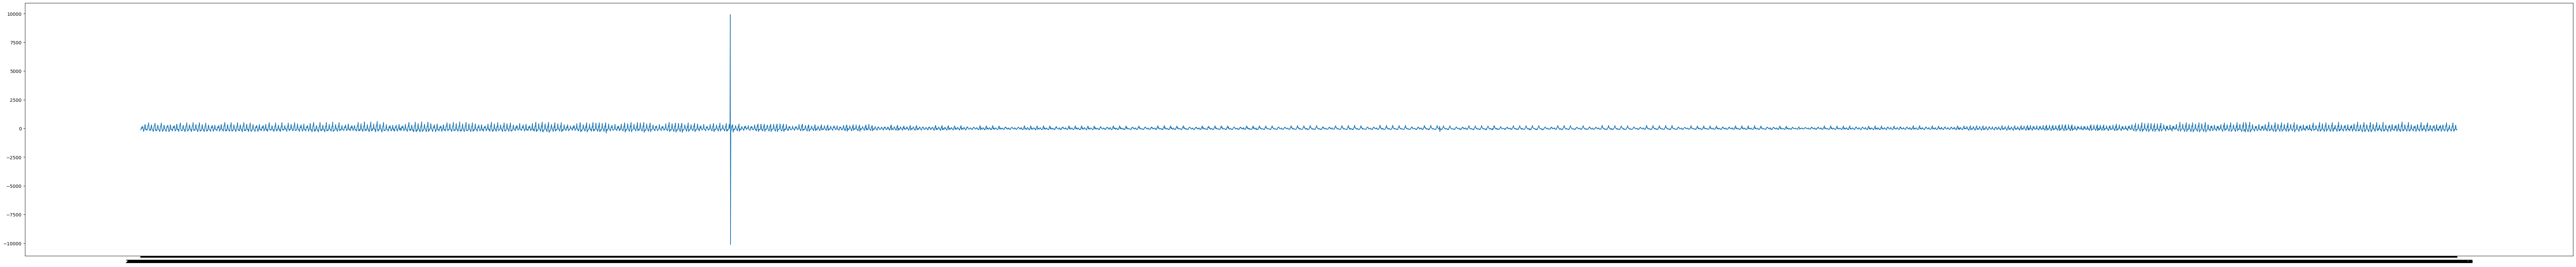

In [10]:
fig = plt.figure(figsize=(100, 10))
ax = plt.axes()

ax.plot(a2013_df.loc[:, 'timestamp'], a2013_df.loc[:, 'diff1'])

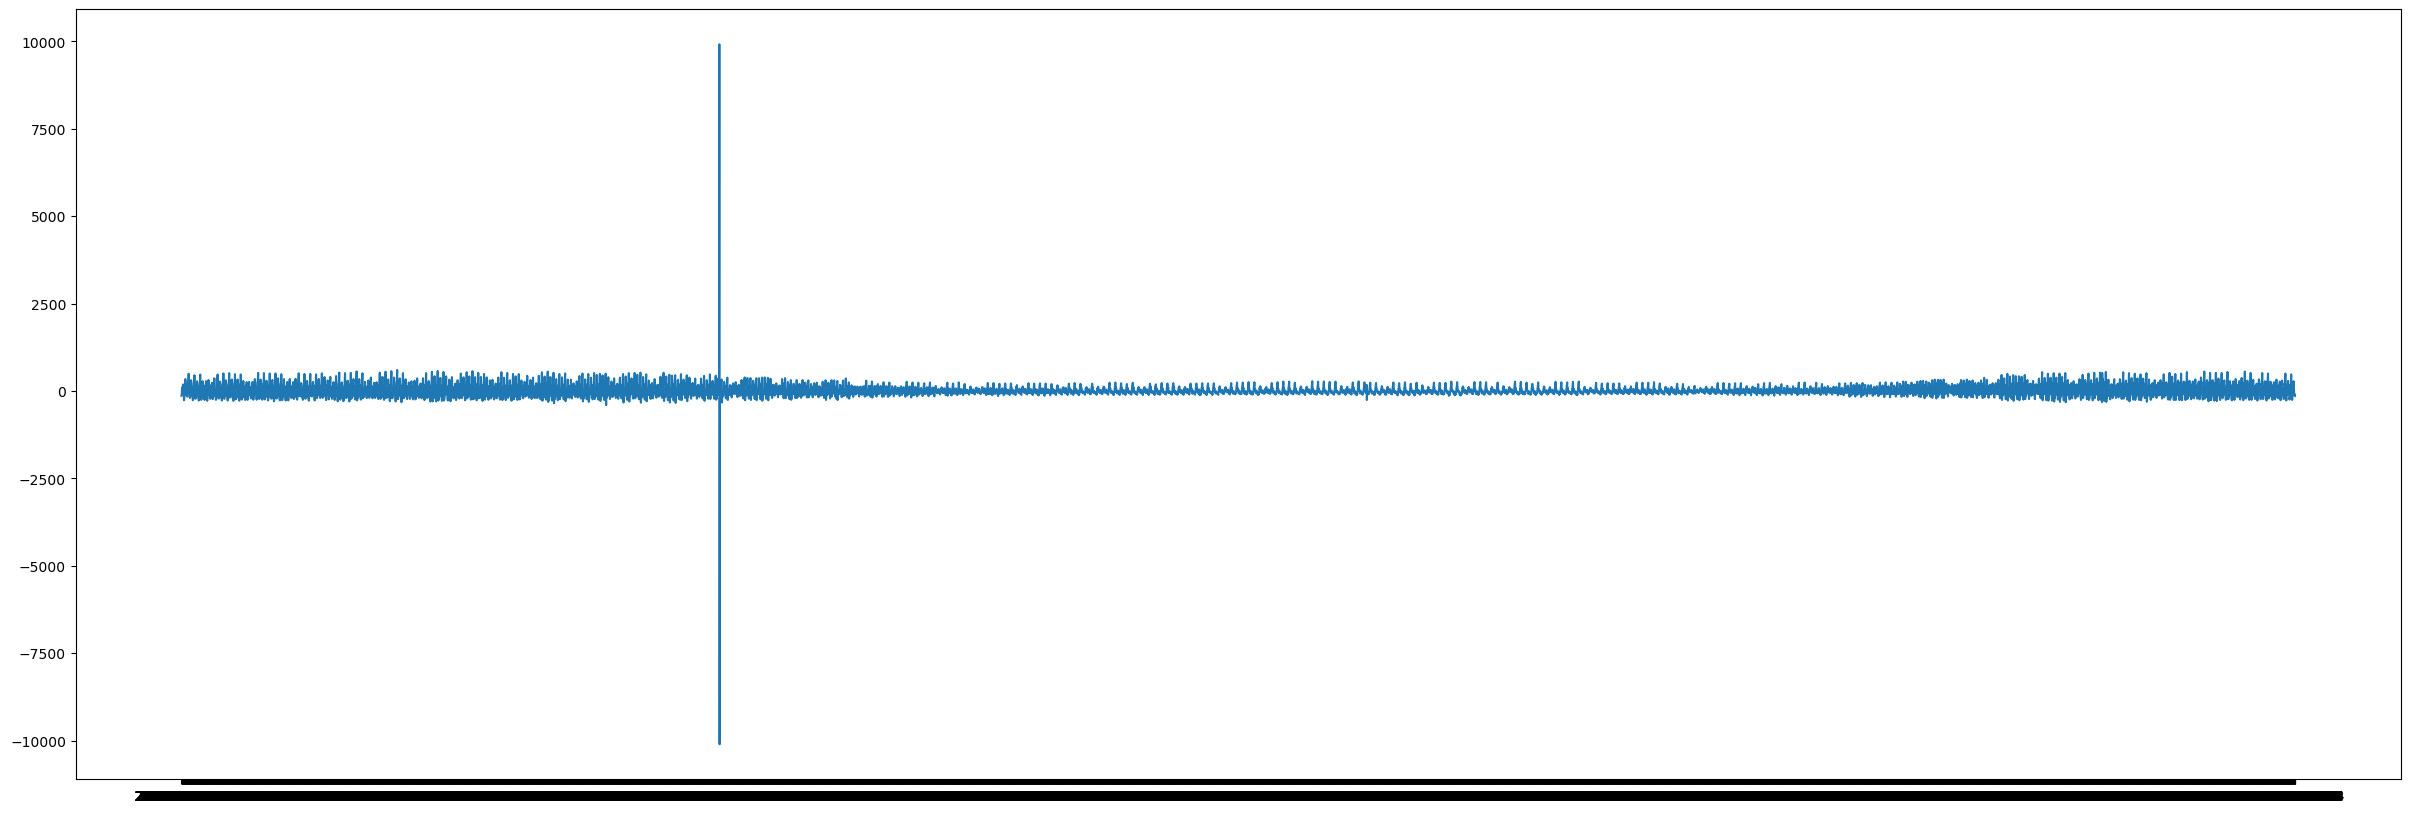

In [11]:
fig = plt.figure(figsize=(30, 10))
ax = plt.axes()

ax.plot(a2013_df.loc[1:, 'timestamp'], a2013_df.loc[1:, 'diff1'])